# Section 05 
### Introduction to Data Science EN.553.436/EN.553.636 - Fall 2021

# 1. Principal Component Analysis

## Problem 1 
Load the breast cancer dataset from the sklearn.datasets and read the description of the dataset.

In [2]:
# load the breast cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# discription of the dataset
print(type(cancer))
print(cancer['DESCR'])

<class 'sklearn.utils.Bunch'>
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For 

In [8]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## 1.1 
Convert the dataset to a dataframe and use feature names as the column names. Plot the covariance matrix. What does it look like?

In [10]:
import pandas as pd

cancer_df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


[[ 2.43239539e+02  9.61209079e+01  1.67358540e+03  2.39829854e+04
   1.65590799e-01  1.84496304e+00  3.72387816e+00  2.20296090e+00
   2.79557318e-01 -1.51865696e-01  1.29983926e+01 -3.70548707e+00
   9.40833189e+01  2.31054882e+03 -4.61321047e-02  2.54630761e-01
   4.04628079e-01  1.60206614e-01 -5.95221244e-02 -7.78796273e-03
   3.23441713e+02  1.26000028e+02  2.23847958e+03  3.69832091e+04
   1.88509899e-01  4.49012235e+00  7.58743097e+00  3.37651985e+00
   7.00123812e-01  8.80860394e-03]
 [ 9.61209079e+01  3.62323453e+02  6.74544249e+02  9.51877486e+03
  -2.77101498e-02  1.05308778e+00  2.03093970e+00  9.59272221e-01
   1.64893840e-01 -4.54626854e-02  6.44459446e+00  1.79545793e+01
   4.79754104e+01  9.95779705e+02  1.67285606e-03  2.89613381e-01
   3.64380422e-01  8.51682634e-02  6.35586034e-03  1.21389951e-02
   1.43552540e+02  4.72226357e+02  1.01350655e+03  1.64775592e+04
   1.49071987e-01  3.68240328e+00  5.29043195e+00  1.63526914e+00
   5.47277694e-01  1.81370799e-01]
 [ 1.6

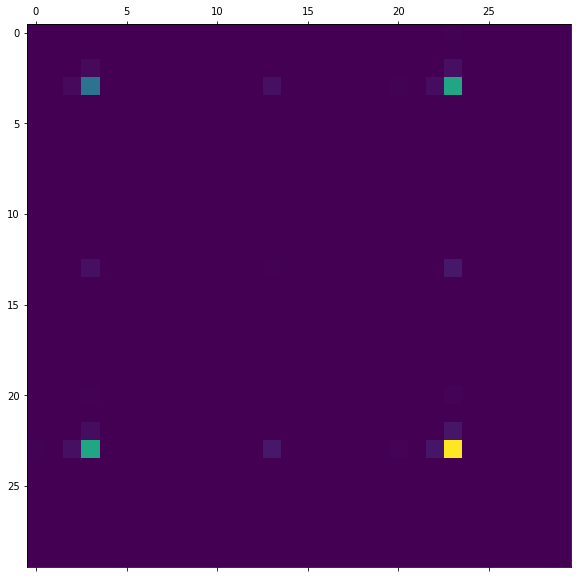

In [27]:
# plot covariance matrix
import matplotlib.pyplot as plt

# convert dataframe to matrix
cancer_M = cancer_df.values.T

# ((cancer_M-cancer_M.mean(axis=1, keepdims=True)) @ (cancer_M-cancer_M.mean(axis=1, keepdims=True)).T)/(cancer_M.shape[1]-1)
Xtilde = cancer_M - cancer_M.mean(axis=1, keepdims=True) # axis = 1: 2d array, to take the mean of each row; axis=0: mean of each col
covariance = Xtilde.dot(Xtilde.T) / (Xtilde.shape[0]-1) # 0的意义：tuple to int
# print(covariance)
# plot
fig = plt.figure(figsize=(10,10)) 
ax = fig.add_subplot(1,1,1)
# use matshow to plot covariance matrix 
ax.matshow(covariance)

The covariance matrix looks like very sparse and most entries are 0.

## 1.2
Scale the data and then plot the covariance matrix of the new data.

In [40]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_cancer = scaler.fit_transform(cancer_df)
# note that the scaled_cancer_df is a numpy.ndarray and is not a dataframe
print(type(scaled_cancer))
print(scaled_cancer.shape)

<class 'numpy.ndarray'>
(569, 30)


(30, 569)


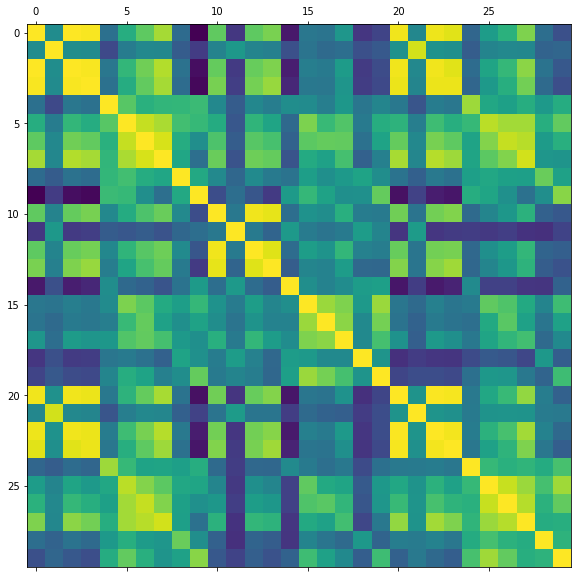

In [51]:
# plot the new covariance matrix
# Xtilde_scaled = scaled_cancer - scaled_cancer.mean(axis=1, keepdims=True)
scaled_cancer_M = scaled_cancer.T
# fig = plt.figure(figsize=(10,10)) 
# ax = fig.add_subplot(1,1,1)
# ax.matshow(covariance)
Xtilde_scaled = scaled_cancer_M-scaled_cancer_M.mean(axis=1, keepdims=True)
covariance = Xtilde_scaled.dot(Xtilde_scaled.T) / (Xtilde_scaled.shape[0]-1)
print(scaled_cancer_M.shape)
fig = plt.figure(figsize=(10,10)) 
ax = fig.add_subplot(1,1,1)
ax.matshow(covariance)

## 1.3 
Implement PCA and use scree plot to analyze the results. Plot the covariance of the projected data matrix (in the original coordinate system) which is X_k in the notation of our lecture and plot the principal components. Try different number of components. 


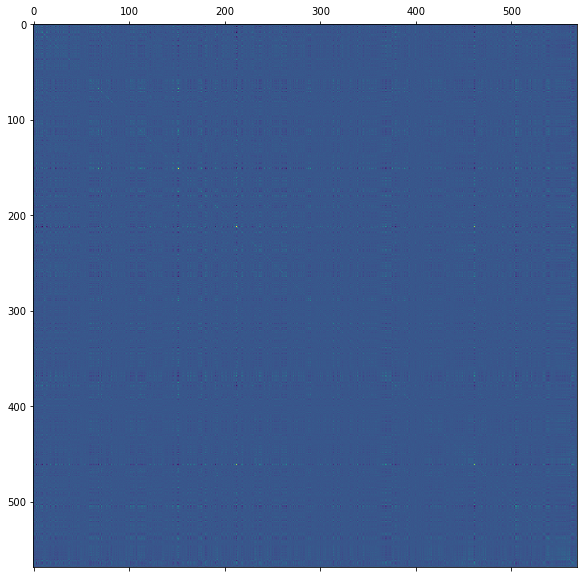

## 1.4 
Visualize the scaled data by plotting only on the first two features with the label.Then plot the PCA results using the first two compnents. Compare these two pictures and what can you find about them?  Try different pairs of features.


## 1.5

Create a 2D biplot and try to check how the first eight variable are behaved.